***
**Kit Data Science**

**Project : Data Science & French Health Expenditures**

***Dépassements d'honoraires: Facteurs de risque***

***

**Packages**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.externals import joblib
plt.style.use('seaborn')
%matplotlib inline

In [2]:
RANDOM_STATE = 1492

In [3]:
import lightgbm as lgb
import shap
from category_encoders import TargetEncoder

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
init_notebook_mode(connected=True)

# **Datasets**

## Load Main Dataset

[Open DAMIR: Ensemble des remboursements de l'assurance-maladie tous régimes confondus](https://www.data.gouv.fr/fr/datasets/open-damir-base-complete-sur-les-depenses-dassurance-maladie-inter-regimes/).

Uniquement le fichier `A201812.csv.gz`.

In [ ]:
%%time
df = pd.read_csv('data/A201812.csv.gz', sep=';')

In [8]:
debug = False
if debug:
    df = df.head(100000)

In [6]:
df = df.iloc[:,:]
df.shape

(31358125, 56)

In [13]:
df.head()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
0,201812,53,60,53,0,1,1,0,2206,53,...,0,0,1,2,99,0,0,1,2,1
1,201812,84,60,84,0,1,2,121,9999,99,...,0,1,37,1,44,0,1,37,1,1
2,201812,11,80,11,0,1,2,121,9999,99,...,0,1,15,1,11,0,1,15,1,1
3,201812,11,20,32,0,1,2,121,9999,99,...,30,3,0,1,32,0,1,5,1,1
4,201812,24,20,11,0,1,2,121,9999,99,...,50,2,0,1,11,0,1,7,1,1


## Variable Types & Missing Values

In [14]:
df.dtypes.sort_index()

AGE_BEN_SNDS      int64
ASU_NAT           int64
ATT_NAT           int64
BEN_CMU_TOP       int64
BEN_QLT_COD       int64
BEN_RES_REG       int64
BEN_SEX_COD       int64
CPL_COD           int64
CPT_ENV_TYP       int64
DDP_SPE_COD       int64
DRG_AFF_NAT       int64
ETE_CAT_SNDS      int64
ETE_IND_TAA       int64
ETE_REG_COD       int64
ETE_TYP_SNDS      int64
ETP_CAT_SNDS      int64
ETP_REG_COD       int64
EXE_INS_REG       int64
EXO_MTF           int64
FLT_ACT_COG     float64
FLT_ACT_QTE       int64
FLT_DEP_MNT     float64
FLT_PAI_MNT     float64
FLT_REM_MNT     float64
FLX_ANN_MOI       int64
MDT_TYP_COD       int64
MFT_COD           int64
MTM_NAT           int64
ORG_CLE_REG       int64
PRE_INS_REG       int64
PRS_ACT_COG     float64
PRS_ACT_QTE       int64
PRS_DEP_MNT     float64
PRS_FJH_TYP       int64
PRS_NAT           int64
PRS_PAI_MNT     float64
PRS_PDS_QCP       int64
PRS_PPU_SEC       int64
PRS_REM_BSE     float64
PRS_REM_MNT     float64
PRS_REM_TAU     float64
PRS_REM_TYP     

In [15]:
df.isnull().sum().sort_values(ascending=False)

TOP_PS5_TRG     0
FLT_DEP_MNT     0
FLT_ACT_QTE     0
FLT_ACT_COG     0
PRS_REM_MNT     0
PRS_REM_BSE     0
PRS_PAI_MNT     0
PRS_DEP_MNT     0
PRS_ACT_QTE     0
PRS_ACT_COG     0
PRS_FJH_TYP     0
MFT_COD         0
MDT_TYP_COD     0
ETP_CAT_SNDS    0
ETP_REG_COD     0
ETE_TYP_SNDS    0
ETE_REG_COD     0
ETE_CAT_SNDS    0
DDP_SPE_COD     0
BEN_SEX_COD     0
BEN_QLT_COD     0
BEN_CMU_TOP     0
BEN_RES_REG     0
AGE_BEN_SNDS    0
ORG_CLE_REG     0
FLT_PAI_MNT     0
FLT_REM_MNT     0
PSP_STJ_SNDS    0
SOI_ANN         0
PSP_SPE_SNDS    0
PSP_ACT_CAT     0
PSP_ACT_SNDS    0
PRE_INS_REG     0
PSE_STJ_SNDS    0
PSE_SPE_SNDS    0
PSE_ACT_CAT     0
PSE_ACT_SNDS    0
EXE_INS_REG     0
PRS_PDS_QCP     0
PRS_REM_TYP     0
PRS_REM_TAU     0
PRS_PPU_SEC     0
PRS_NAT         0
MTM_NAT         0
EXO_MTF         0
ETE_IND_TAA     0
DRG_AFF_NAT     0
CPT_ENV_TYP     0
CPL_COD         0
ATT_NAT         0
ASU_NAT         0
SOI_MOI         0
FLX_ANN_MOI     0
dtype: int64

In [17]:
# df.drop(['Unnamed: 55', 'PRS_ACT_NBR', 'FLT_ACT_NBR'], axis=1, inplace=True)
# df.shape

## Target Variable

[Reimbursement Formula](https://github.com/SGMAP-AGD/DAMIR/wiki/remboursement)

**Terminology**:

- `EXO_MTF`: Motif de l'exonération du ticket modérateur (intervention personnelle ou dépenses qui sont à la charge du patient) 
- `MTM_NAT`: Motif de modulation du ticket modérateur
- `PRS_REM_MNT`: Remboursement sécurité sociale
- `PRS_DEP_MNT`: Dépassement d'honoraires
- `PRS_REM_BSE`: Tarif de convention où `PRS_RMB_BASE` = `PRS_REM_MNT` + `PRS_DEP_MNT`

In [18]:
targetVariables = ['PRS_REM_BSE', 'PRS_REM_MNT', 'PRS_DEP_MNT']

df[targetVariables].head(10)

,PRS_REM_BSE,PRS_REM_MNT,PRS_DEP_MNT
0,0.00,-4.00,0.00
1,0.00,-2.00,0.00
2,204.84,143.40,42.55
3,11.34,6.81,0.00
4,0.00,-109.18,0.00
5,7.50,7.50,0.00
6,9.18,9.18,0.00
7,100.00,70.00,20.00
8,46.00,46.00,0.00
9,0.00,76.11,0.00


In [19]:
df[targetVariables].describe()

,PRS_REM_BSE,PRS_REM_MNT,PRS_DEP_MNT
count,3.135812e+07,3.135812e+07,3.135812e+07
mean,3.099846e+02,3.402784e+02,2.660192e+01
std,8.081234e+03,1.577194e+04,1.949386e+03
min,-1.805160e+06,-1.805160e+06,-5.781980e+05
25%,1.020000e+00,1.500000e+00,0.000000e+00
50%,1.428000e+01,1.381000e+01,0.000000e+00
75%,6.750000e+01,5.760000e+01,0.000000e+00
max,1.691000e+07,2.463934e+07,2.455443e+06


In [20]:
print(df[targetVariables][df.PRS_REM_BSE<0].shape)
print(df[targetVariables][df.PRS_REM_BSE==0].shape)
print(df[targetVariables][df.PRS_REM_BSE>0].shape)

(330431, 3)
(7212890, 3)
(23814804, 3)


In [21]:
print(df[targetVariables][df.PRS_REM_MNT<0].shape)
print(df[targetVariables][df.PRS_REM_MNT==0].shape)
print(df[targetVariables][df.PRS_REM_MNT>0].shape)

(4516247, 3)
(597236, 3)
(26244642, 3)


In [22]:
print(df[targetVariables][df.PRS_DEP_MNT<0].shape)
print(df[targetVariables][df.PRS_DEP_MNT==0].shape)
print(df[targetVariables][df.PRS_DEP_MNT>0].shape)

(23300, 3)
(29821650, 3)
(1513175, 3)


## Focus: *Depassement d'honoraires*

We are only going to focus on overrun fees (*dépassement d'honoraires*):

In [23]:
dfMain = df[df.PRS_DEP_MNT>0].copy()

In [24]:
dfMain.shape

(1513175, 53)

In [25]:
dfMain.to_parquet("data/A201812_Honoraires.parquet")

In [26]:
del df; gc.collect();

# **Exploratory Data Analysis**

In [7]:
dfMain = pd.read_parquet("data/A201812_Honoraires.parquet")

## Target Variable

In [8]:
dfMain.head()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
2,201812,11,80,11,0,1,2,121,9999,99,...,0,1,15,1,11,0,1,15,1,1
7,201812,93,60,93,0,1,2,121,9999,99,...,0,1,1,9,84,0,1,1,9,1
34,201812,11,60,75,0,1,1,121,9999,99,...,0,1,4,1,75,0,1,4,1,1
47,201812,84,40,84,1,1,1,121,9999,99,...,60,2,0,9,84,0,1,1,9,0
52,201812,11,30,11,0,1,1,121,9999,99,...,0,1,4,9,11,0,1,1,9,1


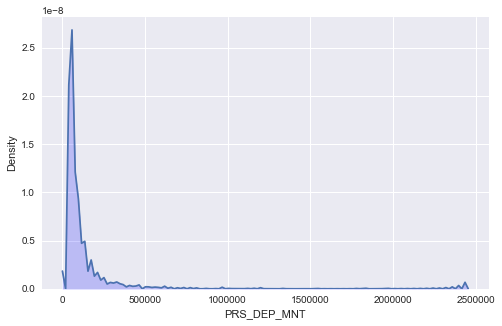

In [9]:
plt.figure(figsize=(8,5))

ax = sns.distplot(a=dfMain['PRS_DEP_MNT'], hist=False,
                  fit_kws=dict(color='black'))

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1, y1, color="blue", alpha=0.2)

ax.set_ylabel("Density")
plt.grid(True)
plt.show()

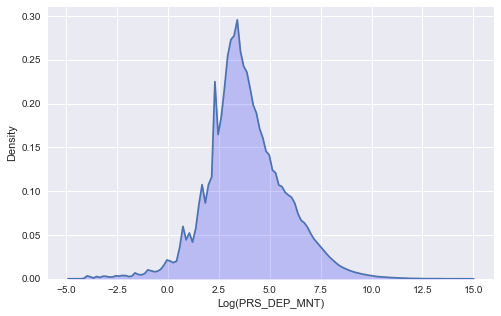

In [10]:
plt.figure(figsize=(8,5))

ax = sns.distplot(a=np.log(dfMain['PRS_DEP_MNT']), hist=False,
                  fit_kws=dict(color='black'))

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1, y1, color="blue", alpha=0.2)

ax.set_xlabel("Log(PRS_DEP_MNT)")
ax.set_ylabel("Density")
plt.grid(True)
plt.show()

In [11]:
dfMain['LOG_PRS_DEP_MNT'] = np.log(dfMain['PRS_DEP_MNT'])

## Variable Distribution (Integer Columns)

In [12]:
dfMain.dtypes.value_counts()

int64      43
float64    11
dtype: int64

In [13]:
varIntegerCols = dfMain.dtypes[dfMain.dtypes=='int64'].index.tolist()
varFloatCols = dfMain.dtypes[dfMain.dtypes=='float64'].index.tolist()

In [14]:
varIntegerCols[:6]

['FLX_ANN_MOI',
 'ORG_CLE_REG',
 'AGE_BEN_SNDS',
 'BEN_RES_REG',
 'BEN_CMU_TOP',
 'BEN_QLT_COD']

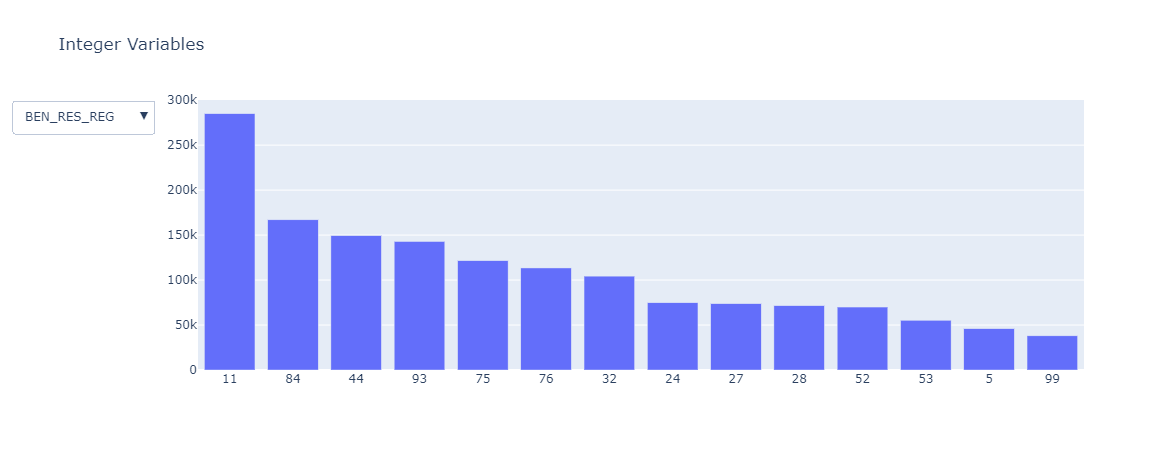

In [15]:
fig = go.Figure()

def add_value_count_trace(df, col):
    addTraceObj = \
        go.Bar(x=list(dfMain[col].value_counts().index),
               y=list(dfMain[col].value_counts()), visible=False)
    return addTraceObj

figAllTraces = [add_value_count_trace(dfMain, col)
                for col in varIntegerCols]

BUTTONS = []
i=-1
visibleOptions = [False for i in range(0,len(figAllTraces))]
for col in varIntegerCols:
    i+=1
    #print(i)
    #print(col)
    visibleList = copy.copy(visibleOptions)
    visibleList[i] = True
    tempDict = dict(label=col, method='update',
                    args=[{'visible': visibleList}])
    BUTTONS.append(tempDict)

for tempFig in figAllTraces:
    fig.add_trace(tempFig)

fig.update_layout(dict(xaxis={'type':'category'}), title_text="Integer Variables")    
    
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=-1,
            buttons=BUTTONS,
            showactive=True
        )
    ]
)

fig.show()

In [16]:
variablesOfInterest = [
    "ORG_CLE_REG", "AGE_BEN_SNDS", "BEN_RES_REG", "BEN_CMU_TOP", "BEN_QLT_COD",
    "BEN_SEX_COD", "DDP_SPE_COD", "MDT_TYP_COD", "PRS_FJH_TYP", "SOI_ANN",
    "SOI_MOI", "ASU_NAT", "CPT_ENV_TYP", "DRG_AFF_NAT", "EXO_MTF", "MTM_NAT",
    "PRS_NAT", "PRS_REM_TYP", "PRS_PDS_QCP", "EXE_INS_REG", "PSE_ACT_SNDS",
    "PSE_ACT_CAT", "PSE_SPE_SNDS", "PSE_STJ_SNDS", "PRE_INS_REG", "PSP_ACT_SNDS",
    "PSP_ACT_CAT", "PSP_SPE_SNDS", "PSP_STJ_SNDS", "TOP_PS5_TRG"
]

Throught visual inspection, we will retain the following categorical variables:

- `ORG_CLE_REG`
- `AGE_BEN_SNDS`
- `BEN_RES_REG`
- `BEN_CMU_TOP`
- `BEN_QLT_COD`
- `BEN_SEX_COD`
- `DDP_SPE_COD`
- `MDT_TYP_COD`
- `PRS_FJH_TYP`
- `SOI_ANN`
- `SOI_MOI`
- `ASU_NAT`
- `CPT_ENV_TYP`
- `DRG_AFF_NAT`
- `EXO_MTF`
- `MTM_NAT`
- `PRS_NAT`
- `PRS_REM_TYP`
- `PRS_PDS_QCP`
- `EXE_INS_REG`
- `PSE_ACT_SNDS`
- `PSE_ACT_CAT`
- `PSE_SPE_SNDS`
- `PSE_STJ_SNDS`
- `PRE_INS_REG`
- `PSP_ACT_SNDS`
- `PSP_ACT_CAT`
- `PSP_SPE_SNDS`
- `PSP_STJ_SNDS`
- `TOP_PS5_TRG`

## Variable Distribution (Float Columns)

In [17]:
varFloatCols

['PRS_ACT_COG',
 'PRS_DEP_MNT',
 'PRS_PAI_MNT',
 'PRS_REM_BSE',
 'PRS_REM_MNT',
 'FLT_ACT_COG',
 'FLT_PAI_MNT',
 'FLT_DEP_MNT',
 'FLT_REM_MNT',
 'PRS_REM_TAU',
 'LOG_PRS_DEP_MNT']

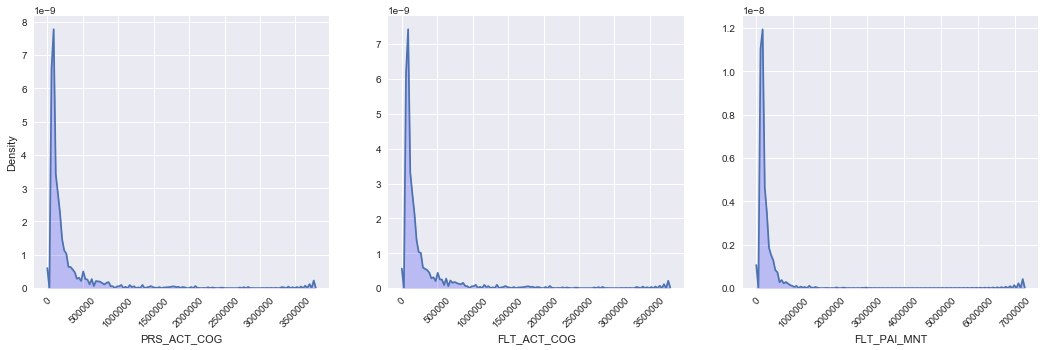

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

# PLOT 0: Coefficient Global
sns.distplot(dfMain['PRS_ACT_COG'], hist=False, ax=ax[0])
l1 = ax[0].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax[0].set_ylabel("Density")
ax[0].fill_between(x1, y1, color="blue", alpha=0.2)
ax[0].tick_params(axis='x', rotation=45)

# PLOT 1: Coefficient Global de la Prestation Préfiltré
sns.distplot(dfMain['FLT_ACT_COG'], hist=False, ax=ax[1])
l1 = ax[1].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax[1].fill_between(x1, y1, color="blue", alpha=0.2)
ax[1].tick_params(axis='x', rotation=45)

# PLOT 2: Montant de la Dépense de la Prestation Préfiltrée
sns.distplot(dfMain['FLT_PAI_MNT'], hist=False, ax=ax[2])
l1 = ax[2].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax[2].fill_between(x1, y1, color="blue", alpha=0.2)
ax[2].tick_params(axis='x', rotation=45)

plt.show()

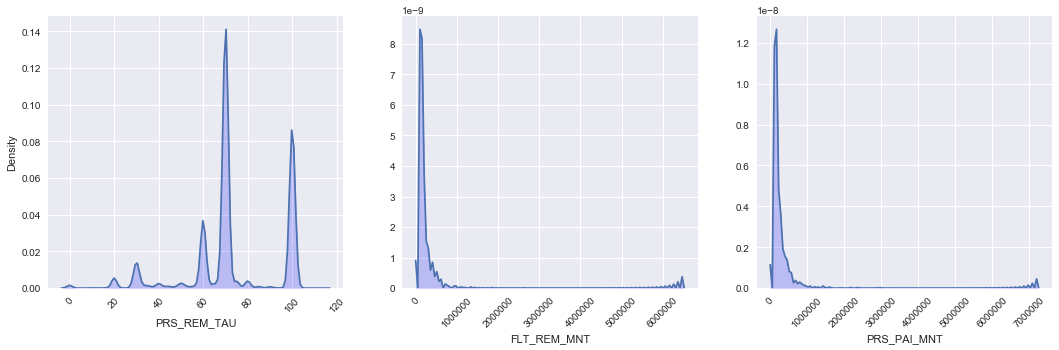

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

# PLOT 0: Coefficient Global
sns.distplot(dfMain['PRS_REM_TAU'], hist=False, ax=ax[0])
l1 = ax[0].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax[0].set_ylabel("Density")
ax[0].fill_between(x1, y1, color="blue", alpha=0.2)
ax[0].tick_params(axis='x', rotation=45)

# PLOT 1: Coefficient Global de la Prestation Préfiltré
sns.distplot(dfMain['FLT_REM_MNT'], hist=False, ax=ax[1])
l1 = ax[1].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax[1].fill_between(x1, y1, color="blue", alpha=0.2)
ax[1].tick_params(axis='x', rotation=45)

# PLOT 2: Montant de la Dépense de la Prestation Préfiltrée
sns.distplot(dfMain['PRS_PAI_MNT'], hist=False, ax=ax[2])
l1 = ax[2].lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax[2].fill_between(x1, y1, color="blue", alpha=0.2)
ax[2].tick_params(axis='x', rotation=45)

plt.show()

These variables seem to be related with our target variable `PRS_DEP_MNT` (dépassements d'honoraires). We are only going to consider categorical variables.

# **Feature Engineering and Model Training**

In [20]:
print("Features:", len(variablesOfInterest))
columnsSelect = variablesOfInterest + ['LOG_PRS_DEP_MNT']

Features: 30


In [21]:
dfMainFE = dfMain[columnsSelect].copy()

In [22]:
dfMainFE.shape

(1513175, 31)

## Train / Testing Split

In [23]:
X = dfMainFE[variablesOfInterest].copy()
y = dfMainFE["LOG_PRS_DEP_MNT"].copy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

In [25]:
print("Train:", X_train.shape, y_test.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (968432, 30) (302635,)
Valid: (242108, 30) (242108,)
Test:  (302635, 30) (302635,)


## Mean Categorical Encoding

In [26]:
%%time
targetEncoder = TargetEncoder(cols=variablesOfInterest).fit(X_train, y_train)

Wall time: 37.9 s


In [27]:
X_train_encoded = targetEncoder.transform(X_train, y_train)
X_valid_encoded = targetEncoder.transform(X_valid)
X_test_encoded = targetEncoder.transform(X_test)

In [28]:
X_train_encoded.head()

,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,MDT_TYP_COD,PRS_FJH_TYP,SOI_ANN,...,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG
12511867,3.795924,3.885897,3.784080,4.168252,3.843393,3.804169,3.965155,3.821567,3.925143,3.840266,...,3.673815,3.64418,3.720196,3.853037,3.630209,3.672215,3.508245,3.939373,3.760482,4.148798
3675399,3.965206,3.828216,4.082841,3.349247,3.870141,3.804169,3.652776,3.821567,3.925143,3.840266,...,3.673815,3.64418,3.720196,3.853037,3.981452,3.672215,3.508245,3.939373,3.760482,3.349247
14527005,3.841918,3.583784,3.822882,4.168252,3.843393,3.804169,3.965155,3.821567,3.925143,3.840266,...,3.673815,3.64418,3.046261,3.853037,3.695149,3.672215,3.508245,3.255020,3.760482,4.148798
4525398,3.841918,3.694440,3.822882,3.349247,3.843393,3.865405,3.652776,3.821567,3.925143,3.840266,...,3.673815,3.64418,3.440327,3.853037,3.981452,3.672215,3.508245,3.343620,3.760482,3.349247
4514513,3.965206,3.885897,3.858407,3.349247,3.657058,3.804169,3.652776,3.821567,3.619910,3.840266,...,3.673815,3.64418,3.338125,3.646687,3.981452,3.672215,3.508245,3.327949,3.840860,3.349247


## Linear Regression

In [32]:
# Model Training
linReg = LinearRegression()
linReg.fit(X_train_encoded, y_train)

# Model Evaluation
y_pred = linReg.predict(X_test_encoded)
mse_linReg = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae_linReg = median_absolute_error(y_true=y_test, y_pred=y_pred)
r2_linReg = r2_score(y_test, y_pred)

print("MSE (Test Set):", mse_linReg)
print("MAE (Test Set):", mae_linReg)
print("R-squared (Test Set):", r2_linReg)

MSE (Test Set): 1.8853145388658965
MAE (Test Set): 0.7272648830720563
R-squared (Test Set): 0.5167219614355386


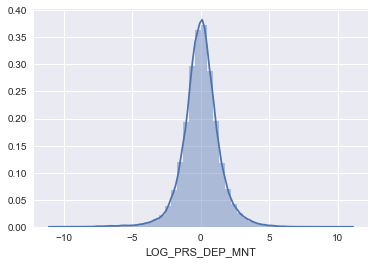

In [33]:
# Visualisations of Residuals
residuals = y_test - y_pred
sns.distplot(residuals)
plt.show()

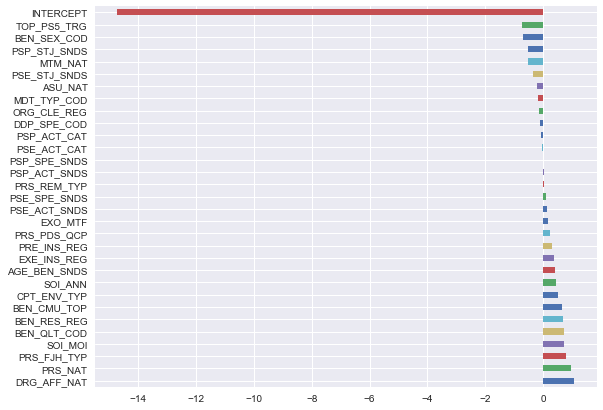

In [34]:
# Interpretation of Coefficients
coefficients = linReg.coef_
coefficients = np.append(coefficients, linReg.intercept_)
coefficients = pd.Series(coefficients, index=variablesOfInterest + ["INTERCEPT"])
coefficients.sort_values(ascending=False).plot.barh(figsize=(9,7))
plt.show()

In [35]:
coefficients.sort_values(ascending=False)

DRG_AFF_NAT      1.067375
PRS_NAT          0.954151
PRS_FJH_TYP      0.798308
SOI_MOI          0.729653
BEN_QLT_COD      0.722909
BEN_RES_REG      0.690378
BEN_CMU_TOP      0.655620
CPT_ENV_TYP      0.516864
SOI_ANN          0.443688
AGE_BEN_SNDS     0.400375
EXE_INS_REG      0.383568
PRE_INS_REG      0.323998
PRS_PDS_QCP      0.233297
EXO_MTF          0.166387
PSE_ACT_SNDS     0.135520
PSE_SPE_SNDS     0.101824
PRS_REM_TYP      0.026862
PSP_ACT_SNDS     0.018759
PSP_SPE_SNDS    -0.004935
PSE_ACT_CAT     -0.048405
PSP_ACT_CAT     -0.058043
DDP_SPE_COD     -0.094705
ORG_CLE_REG     -0.136015
MDT_TYP_COD     -0.183651
ASU_NAT         -0.199951
PSE_STJ_SNDS    -0.338951
MTM_NAT         -0.516251
PSP_STJ_SNDS    -0.518050
BEN_SEX_COD     -0.706232
TOP_PS5_TRG     -0.719784
INTERCEPT      -14.726363
dtype: float64

## LightGBM Gradient Boosting

In [37]:
%%time
# Model Training
lgb_train = lgb.Dataset(X_train_encoded, y_train)
lgb_valid = lgb.Dataset(X_valid_encoded, y_valid)

params = {
    'boosting_type': 'dart',
    'metric': 'l2_root', # RMSE
    'verbose': 1,
    'seed': RANDOM_STATE,
    'max_depth': 12,
    'learning_rate': 1.0,
    'reg_lambda': 0.01,
    'reg_alpha': 0.01,
    'subsample': 0.7,
    'num_leaves': 140,
    'feature_fraction': 0.9,
    'drop_rate': 0.2
}

modelLgbm = lgb.train(params, lgb_train, num_boost_round=1500, valid_sets=lgb_valid,
                      early_stopping_rounds=200, verbose_eval=50)

Training until validation scores don't improve for 200 rounds.
[50]	valid_0's rmse: 1.13955
[100]	valid_0's rmse: 1.10365
[150]	valid_0's rmse: 1.09352
[200]	valid_0's rmse: 1.08265
[250]	valid_0's rmse: 1.07578
[300]	valid_0's rmse: 1.06794
[350]	valid_0's rmse: 1.06393
[400]	valid_0's rmse: 1.05898
[450]	valid_0's rmse: 1.05798
[500]	valid_0's rmse: 1.05592
[550]	valid_0's rmse: 1.05518
[600]	valid_0's rmse: 1.05438
[650]	valid_0's rmse: 1.05321
[700]	valid_0's rmse: 1.05176
[750]	valid_0's rmse: 1.05186
[800]	valid_0's rmse: 1.05151
[850]	valid_0's rmse: 1.05097
[900]	valid_0's rmse: 1.05062
[950]	valid_0's rmse: 1.05014
[1000]	valid_0's rmse: 1.05054
[1050]	valid_0's rmse: 1.04981
[1100]	valid_0's rmse: 1.05165
[1150]	valid_0's rmse: 1.0501
[1200]	valid_0's rmse: 1.05095
[1250]	valid_0's rmse: 1.05154
Early stopping, best iteration is:
[1051]	valid_0's rmse: 1.04978
Wall time: 56min 5s


In [38]:
# Model Evaluation
y_pred_lgb = modelLgbm.predict(X_test_encoded)
mse_lgb = mean_squared_error(y_true=y_test, y_pred=y_pred_lgb)
mae_lgb = median_absolute_error(y_true=y_test, y_pred=y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("MSE (Test Set):", mse_lgb)
print("MAE (Test Set):", mae_lgb)
print("R-squared (Test Set):", r2_lgb)

MSE (Test Set): 1.130189006381154
MAE (Test Set): 0.5908392354982555
R-squared (Test Set): 0.7102894424505084


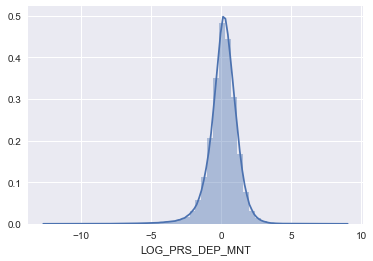

In [39]:
# Visualisations of Residuals
residuals = y_test - y_pred_lgb
sns.distplot(residuals)
plt.show()

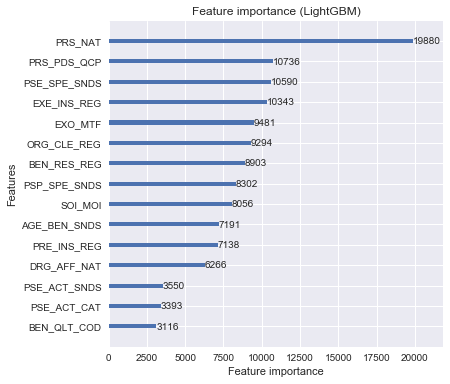

In [40]:
# Feature importance
lgb.plot_importance(modelLgbm, max_num_features=15, figsize=(6,6),
                    title='Feature importance (LightGBM)')
plt.show()

In [43]:
# Persist model
joblib.dump(modelLgbm, 'lgb_model.pkl');

In [44]:
modelLgbm = joblib.load('lgb_model.pkl')

## Interpretation

Main drivers for *Dépassements d'honoraires*:

- *Nature de Prestation* (PRS_NAT): maladie, soin de guerre, maternité, invalidité, etc.
- *Parcours de soin* (PRS_PDS_QCP): sans objet, hors résidence habituelle, executant est (ou non) le medecin traitant déclaré, etc.
- *Spécialité médicale du médecin exécutant* (PSE_SPE_SNDS): chirurgie, radiologie, neurologie, medecine général, etc.
- *Région du médecin exécutant* (EXE_INS_REG)
- *Motif d'exonération du ticket modérateur* (EXO_MTF): assurance, regimes, pension militaire d'invalidité, nature de la prestation, etc.